In [1]:
!pip install japanize_matplotlib
!pip install seaborn
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
input_str=input("意味類似度ネットワークを作りたい単語を入力してください===>")

In [3]:
from gensim.models import Word2Vec

# 学習済みモデルのロード
model_file_path = '../../KITERETU/gw2v160.model'
model = Word2Vec.load(model_file_path)

In [4]:
# モデル内に登録されている単語リストの長さをlen関数で見る（＝単語数）
print(len(model.wv.key_to_index))

# 「赤」に似ている単語TOP7を書き出す
out = model.wv.most_similar(positive=[input_str], topn=10)
print(out)

293753
[('青', 0.8831947445869446), ('黄色', 0.7592792510986328), ('白', 0.7574406862258911), ('青色', 0.7550033926963806), ('黒', 0.7461652159690857), ('ずきん', 0.7437013983726501), ('赤青', 0.7349072694778442), ('赤色', 0.7316375970840454), ('水色', 0.7268540859222412), ('赤白', 0.7261124849319458)]


In [5]:
print(out)

#AtCoderでよく使う辞書処理を使って県と数値を取り出す
pre=[]
pre.append(input_str)
for prefecture, value in out:
    print(prefecture, value)
    pre.append(prefecture)

[('青', 0.8831947445869446), ('黄色', 0.7592792510986328), ('白', 0.7574406862258911), ('青色', 0.7550033926963806), ('黒', 0.7461652159690857), ('ずきん', 0.7437013983726501), ('赤青', 0.7349072694778442), ('赤色', 0.7316375970840454), ('水色', 0.7268540859222412), ('赤白', 0.7261124849319458)]
青 0.8831947445869446
黄色 0.7592792510986328
白 0.7574406862258911
青色 0.7550033926963806
黒 0.7461652159690857
ずきん 0.7437013983726501
赤青 0.7349072694778442
赤色 0.7316375970840454
水色 0.7268540859222412
赤白 0.7261124849319458


実装方式に教授の考え方をそのまま応用<br>

それぞれのネットワーク的な接続を数値で表す。<br>
表し方としては、2次元配列を用いる<br>

In [6]:
import pandas as pd

df = pd.crosstab(pre, pre, rownames=['X'], colnames=['Y'])
df

Y,ずきん,水色,白,赤,赤白,赤色,赤青,青,青色,黄色,黒
X,,,,,,,,,,,
ずきん,1,0,0,0,0,0,0,0,0,0,0
水色,0,1,0,0,0,0,0,0,0,0,0
白,0,0,1,0,0,0,0,0,0,0,0
赤,0,0,0,1,0,0,0,0,0,0,0
赤白,0,0,0,0,1,0,0,0,0,0,0
赤色,0,0,0,0,0,1,0,0,0,0,0
赤青,0,0,0,0,0,0,1,0,0,0,0
青,0,0,0,0,0,0,0,1,0,0,0
青色,0,0,0,0,0,0,0,0,1,0,0


In [7]:
for i in pre:
    for j in pre:
        #0を除外する処理を入れていないので計算数がその分多い
        if model.wv.similarity(i,j) >= 1.0:
            df.loc[i,j]=0.0
        elif model.wv.similarity(i,j) >= 0.6:
            df.loc[i,j]=model.wv.similarity(i,j)
        else:
            df.loc[i,j]=0
        #print(df.loc['Bob', 'age'])
        #df.iloc[1,0]
df

Y,ずきん,水色,白,赤,赤白,赤色,赤青,青,青色,黄色,黒
X,,,,,,,,,,,
ずきん,0.000000,0.000000,0.634270,0.743701,0.000000,0.000000,0.640317,0.699213,0.000000,0.000000,0.651609
水色,0.000000,0.000000,0.000000,0.726854,0.679314,0.644407,0.701679,0.748310,0.759461,0.743605,0.000000
白,0.634270,0.000000,0.000000,0.757441,0.641007,0.000000,0.635183,0.759720,0.000000,0.646951,0.856145
赤,0.743701,0.726854,0.757441,0.000000,0.726112,0.731638,0.734907,0.883195,0.755003,0.759279,0.746165
赤白,0.000000,0.679314,0.641007,0.726112,0.000000,0.642518,0.664468,0.689759,0.690383,0.699054,0.000000
赤色,0.000000,0.644407,0.000000,0.731638,0.642518,0.000000,0.000000,0.687241,0.865897,0.872451,0.000000
赤青,0.640317,0.701679,0.635183,0.734907,0.664468,0.000000,0.000000,0.735257,0.694652,0.656581,0.635625
青,0.699213,0.748310,0.759720,0.883195,0.689759,0.687241,0.735257,0.000000,0.764719,0.725679,0.697025
青色,0.000000,0.759461,0.000000,0.755003,0.690383,0.865897,0.694652,0.764719,0.000000,0.867857,0.000000


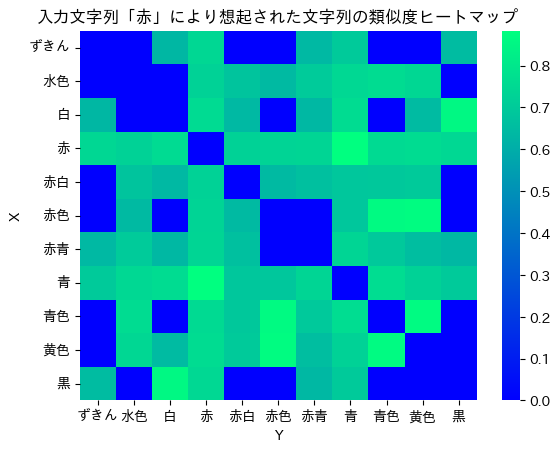

In [8]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib


plt.figure()
plt.title("入力文字列「{}」により想起された文字列の類似度ヒートマップ".format(input_str))
sns.heatmap(df,cmap="winter")
plt.savefig('eaborn_heatmap_dataframe.png')

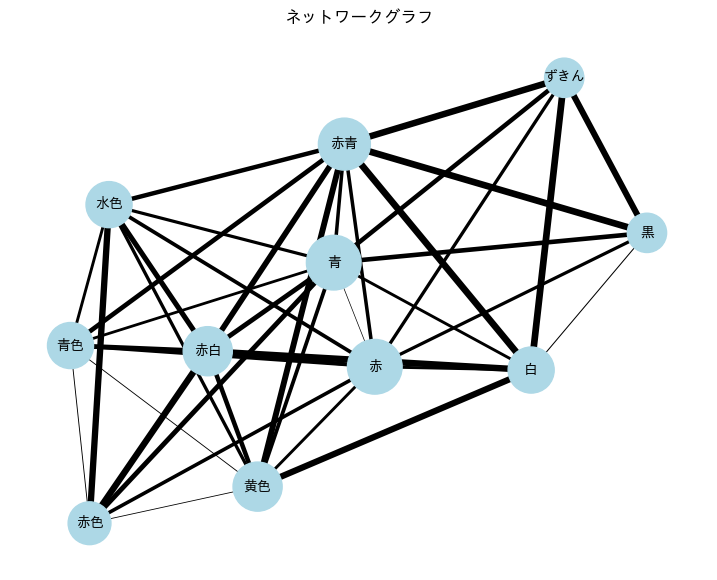

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib

# ネットワークグラフの作成
G = nx.from_pandas_adjacency(df, create_using=nx.Graph)

# グラフの描画
plt.figure(figsize=(len(input_str)+8, len(input_str)+6))
pos = nx.spring_layout(G)  # ノードの位置を設定
weights = nx.get_edge_attributes(G, 'weight')

# 辺の太さを重みに応じて調整
max_weight = max(weights.values())
edge_widths = [(6 * (1 - weights[edge])) ** 2 for edge in G.edges()]

# ノードの太さを重みに応じて調整
node_sizes = [50 + 150 * G.degree(node) for node in G.nodes()]

# グラフを描画
japanize_matplotlib.japanize()
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='black')
nx.draw_networkx_labels(G, pos, font_family='IPAexGothic', font_color='black', font_size=10)
plt.title('ネットワークグラフ')
plt.axis('off')
plt.show()
